# 5 Layer Fully Connected Neural Network

Import tensorflow module, mnist dataset and matplotlib library for ploting learning history

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

Load MNIST data

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Initialize constant variables

In [3]:
K = 200
L = 300
M = 60
N = 30

Define variables and graph for neural network mode

![title](5_layer.png)

5 layer Neural Network:
* Input Layer
* Fully Connected Layer [200 Neurons, Activation RELU]
* Fully Connected Layer [100 Neurons, Activation RELU]
* Fully Connected Layer [60 Neurons, Activation RELU]
* Fully Connected Layer [30 Neurons, Activation RELU]
* Output Layer [Softmax]

**Initialize Model namespaces**

*Fully connected layer definition*

In [4]:
def fully_connected_layer(l_input, l_size, stddev=0.1, activation='relu', name='fc_layer'):
    with tf.name_scope(name):
        weights = tf.Variable(tf.truncated_normal([l_size[0], l_size[1]], stddev=stddev), name='weights')
        bias = tf.Variable(tf.zeros([l_size[1]]), name='bias')
        y_output = tf.matmul(l_input, weights) + bias
        # Get historgrams
        tf.summary.histogram("weights", weights)
        tf.summary.histogram("bias", bias)
        if activation != 'linear':
            y_output = getattr(tf.nn, activation)(y_output)
            tf.summary.histogram("activations", y_output)
        return y_output

In [5]:
with tf.name_scope("input"):
    X = tf.placeholder(tf.float32, [None, 784], name='x')
    image_reshaped_input = tf.reshape(X, [-1, 28, 28, 1])
    tf.summary.image('input', image_reshaped_input, 10)
y_layer_1 = fully_connected_layer(X, [28 * 28, K], stddev=0.1, activation='relu', name='input_layer')
y_layer_2 = fully_connected_layer(y_layer_1, [K, L], stddev=0.1, activation='relu', name='hidden_layer_1')
y_layer_3 = fully_connected_layer(y_layer_2, [L, M], stddev=0.1, activation='relu', name='hidden_layer_2')
y_layer_4 = fully_connected_layer(y_layer_3, [M, N], stddev=0.1, activation='relu', name='hidden_layer_3')
logits = fully_connected_layer(y_layer_4, [N, 10], stddev=0.1, activation='linear', name='output_layer')

In [6]:
Y_pred = tf.placeholder(tf.float32, [None, 10], name='labels')

Define cross entropy [*loss function*]

In [7]:
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_pred))
    tf.summary.scalar("cross_entropy", cross_entropy)

In [8]:
with tf.name_scope('accuracy'):
    is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    tf.summary.scalar("accuracy", accuracy)

Define Gradient Descent Optimizer

In [9]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(1e-4)
    train_step = optimizer.minimize(cross_entropy)

Initialize variables

In [10]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
sess = tf.Session()
sess.run(init)

**Save tensorflow graph**

In [12]:
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("/home/filip/Notebooks/Tensorflow_tutorial/logs")
writer.add_graph(sess.graph)

In [13]:
test_accuracy = []
test_cross = []
for i in range(1000):
    # Load batch
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_pred: batch_Y}

    # Train
    sess.run(train_step, feed_dict=train_data)
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)

    test_data = {X: mnist.test.images, Y_pred: mnist.test.labels}
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    print("Train data Accuracy: {}, Train data Cross Entropy: {}".format(a_train, c_train))
    print("Test data Accuracy: {}, Test data Cross Entropy: {}".format(a_test, c_test))
    
    # Save summary
    if i % 5 == 0:
        sum_res = sess.run(merged_summary, train_data)
        writer.add_summary(sum_res, i)
    # Append to list
    test_accuracy.append(a_test)
    test_cross.append(c_test)

Train data Accuracy: 0.189999997616, Train data Cross Entropy: 2.27326822281
Test data Accuracy: 0.158899992704, Test data Cross Entropy: 2.29616069794
Train data Accuracy: 0.229999989271, Train data Cross Entropy: 2.27560329437
Test data Accuracy: 0.168999999762, Test data Cross Entropy: 2.29294252396
Train data Accuracy: 0.170000001788, Train data Cross Entropy: 2.28618049622
Test data Accuracy: 0.176799997687, Test data Cross Entropy: 2.28970193863
Train data Accuracy: 0.219999998808, Train data Cross Entropy: 2.26055192947
Test data Accuracy: 0.185399994254, Test data Cross Entropy: 2.2864317894
Train data Accuracy: 0.169999986887, Train data Cross Entropy: 2.27564740181
Test data Accuracy: 0.193700000644, Test data Cross Entropy: 2.28311085701
Train data Accuracy: 0.219999998808, Train data Cross Entropy: 2.28201913834
Test data Accuracy: 0.20079998672, Test data Cross Entropy: 2.27978205681
Train data Accuracy: 0.299999982119, Train data Cross Entropy: 2.25352597237
Test data Acc

In [14]:
print("Last Accuracy: {}, Maximum Accuracy: {}".format(test_accuracy[-1], np.max(test_accuracy)))

Last Accuracy: 0.92500013113, Maximum Accuracy: 0.927000105381


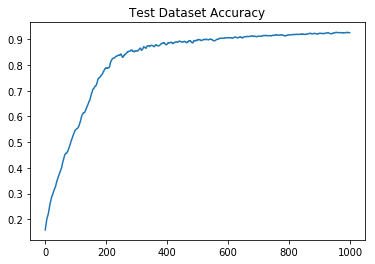

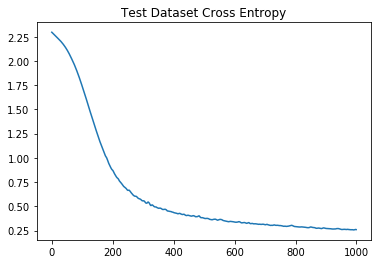

In [15]:
plt.figure()
plt.title("Test Dataset Accuracy")
plt.plot(test_accuracy)
plt.figure()
plt.title("Test Dataset Cross Entropy")
plt.plot(test_cross)
plt.show()